<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Mnist_with_drawingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/techwithtim


https://github.com/techwithtim/Number-Guesser-Neural-Net

In [37]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import model_selection
from sklearn import feature_selection

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



##Data Collecting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle competitions download -c digit-recognizer
!unzip \*.zip && rm *.zip

 85% 13.0M/15.3M [00:00<00:00, 39.0MB/s]
100% 15.3M/15.3M [00:00<00:00, 44.6MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

train: 42000 samples with labels

test: 28000 samples without labels

submission: 28000 labels for test

features: 784

In [5]:
train.shape, test.shape, submission.shape

((42000, 785), (28000, 784), (28000, 2))

##Data Preprocessing

In [6]:
train.iloc[0][train.iloc[0] != 0], test.iloc[0][test.iloc[0] != 0]

(label         1
 pixel132    188
 pixel133    255
 pixel134     94
 pixel159    191
            ... 
 pixel626    250
 pixel627    131
 pixel652    214
 pixel653    218
 pixel654     95
 Name: 0, Length: 98, dtype: int64, pixel122    10
 pixel123    17
 pixel124    17
 pixel125    17
 pixel126    17
             ..
 pixel599    30
 pixel600    15
 pixel601    10
 pixel610    14
 pixel611     6
 Name: 0, Length: 215, dtype: int64)

our images are not scaled so we have to rescale them

In [7]:
X = train.drop(["label"], axis=1).values / 255
Y = train["label"].values
test /= 255
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=77, test_size=0.2)

x_train: 33600  (%80)

x_test:  8400   (%20)

In [8]:
x_train.shape, x_test.shape

((33600, 784), (8400, 784))

In [9]:
784 ** 0.5

28.0

784 is 28*28

Text(0.5, 1.0, '9')

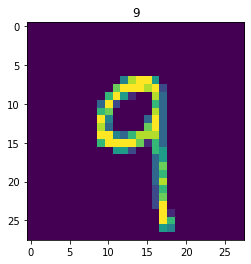

In [10]:
n = 1297
sample = x_train[n].reshape(28, 28)
plt.imshow(sample)
plt.title(y_train[n])

#Machine Learning Models

In [12]:
def model_scores(model):
  s = datetime.datetime.now()
  pred = model.predict(x_test)
  res = sum(pred == y_test)/len(y_test)
  dic = {"train" : model.score(x_train, y_train),
         "Test" : model.score(x_test, y_test)}  

  print("Train Score: " , model.score(x_train, y_train))
  print("Test Score: " , model.score(x_test, y_test))
  print(metrics.classification_report(y_test, pred))
  print(f"Spend time is: {datetime.datetime.now().minute - s.minute} Minuts")
  return pred, dic

##model 0: linear

In [ ]:
model_0 = linear_model.SGDClassifier()
model_0.fit(x_train, y_train)

SGDClassifier()

In [ ]:
pred_0, scores = model_scores(model_0)

Train Score:  0.9264583333333334
Test Score:  0.9142857142857143
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       802
           1       0.95      0.98      0.96       965
           2       0.89      0.90      0.90       828
           3       0.90      0.89      0.89       891
           4       0.93      0.92      0.92       792
           5       0.85      0.89      0.87       731
           6       0.94      0.95      0.95       853
           7       0.92      0.94      0.93       883
           8       0.91      0.83      0.87       795
           9       0.90      0.87      0.88       860

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

Spend time is: 0 Minuts


{'train': 0.9264583333333334, 'Test': 0.9142857142857143}

##Model 1: LogisticRegression

In [ ]:
model_1 = linear_model.LogisticRegression()
model_1.fit(x_train, y_train)

In [ ]:
pred_1, scores = model_scores(model_1)

Train Score:  0.9407142857142857
Test Score:  0.9207142857142857
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       802
           1       0.95      0.97      0.96       965
           2       0.90      0.89      0.90       828
           3       0.90      0.89      0.90       891
           4       0.95      0.92      0.93       792
           5       0.89      0.87      0.88       731
           6       0.95      0.95      0.95       853
           7       0.92      0.94      0.93       883
           8       0.88      0.88      0.88       795
           9       0.89      0.91      0.90       860

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

Spend time is: 0 Minuts


{'train': 0.9407142857142857, 'Test': 0.9207142857142857}

##model 2: Linear SVC

In [ ]:
model_2 = svm.LinearSVC()
model_2.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
pred_2, scores = model_scores(model_2)

Train Score:  0.9339285714285714
Test Score:  0.91
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       802
           1       0.95      0.98      0.96       965
           2       0.89      0.87      0.88       828
           3       0.89      0.87      0.88       891
           4       0.93      0.92      0.92       792
           5       0.86      0.86      0.86       731
           6       0.94      0.95      0.94       853
           7       0.92      0.93      0.93       883
           8       0.88      0.86      0.87       795
           9       0.88      0.89      0.88       860

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

Spend time is: 0 Minuts


{'train': 0.9339285714285714, 'Test': 0.91}

##Model 3: SVC

In [13]:
model_3 = svm.SVC()
model_3.fit(x_train, y_train)

SVC()

In [14]:
pred_3, scores = model_scores(model_3)

Train Score:  0.9888690476190476
Test Score:  0.9745238095238096
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       802
           1       0.99      0.99      0.99       965
           2       0.98      0.98      0.98       828
           3       0.96      0.96      0.96       891
           4       0.97      0.98      0.97       792
           5       0.98      0.96      0.97       731
           6       0.98      0.99      0.99       853
           7       0.97      0.98      0.97       883
           8       0.97      0.97      0.97       795
           9       0.96      0.95      0.96       860

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Prediction time is: 12 Minuts


##Model 4: K neighbors


In [ ]:
model_4 = neighbors.KNeighborsClassifier(n_neighbors=5)
model_4.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
pred_4, scores = model_scores(model_4)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       802
           1       0.96      0.99      0.98       965
           2       0.99      0.96      0.97       828
           3       0.95      0.97      0.96       891
           4       0.98      0.96      0.97       792
           5       0.96      0.94      0.95       731
           6       0.98      0.99      0.98       853
           7       0.95      0.98      0.96       883
           8       0.98      0.91      0.94       795
           9       0.94      0.94      0.94       860

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



##Model 5: DecisionTreeClassifier

In [ ]:
model_5 = tree.DecisionTreeClassifier()
model_5.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_5, scores = model_scores(model_5)

Train Score:  1.0
Test Score:  0.8520238095238095
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       802
           1       0.93      0.95      0.94       965
           2       0.83      0.80      0.82       828
           3       0.81      0.83      0.82       891
           4       0.85      0.85      0.85       792
           5       0.76      0.80      0.78       731
           6       0.89      0.89      0.89       853
           7       0.88      0.88      0.88       883
           8       0.80      0.75      0.78       795
           9       0.82      0.82      0.82       860

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400

Spend time is: 0 Minuts


{'train': 1.0, 'Test': 0.8520238095238095}

##Model 6: RandomForestClassifier

In [15]:
model_6 = ensemble.RandomForestClassifier()
model_6.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
pred_6, scores = model_scores(model_6)

Train Score:  1.0
Test Score:  0.9620238095238095
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       802
           1       0.99      0.99      0.99       965
           2       0.95      0.96      0.96       828
           3       0.94      0.95      0.94       891
           4       0.96      0.96      0.96       792
           5       0.96      0.95      0.96       731
           6       0.98      0.98      0.98       853
           7       0.97      0.96      0.96       883
           8       0.94      0.95      0.94       795
           9       0.94      0.94      0.94       860

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Prediction time is: 0 Minuts


##Model 7: GradientBoostingClassifier

In [ ]:
model_7 = ensemble.GradientBoostingClassifier()
model_7.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
pred_7, scores = model_scores(model_7)

Train Score:  0.9685119047619047
Test Score:  0.9421428571428572
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       802
           1       0.98      0.98      0.98       965
           2       0.94      0.93      0.93       828
           3       0.92      0.92      0.92       891
           4       0.94      0.94      0.94       792
           5       0.94      0.92      0.93       731
           6       0.97      0.96      0.96       853
           7       0.95      0.95      0.95       883
           8       0.92      0.93      0.92       795
           9       0.91      0.92      0.92       860

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400

Spend time is: 0 Minuts


{'train': 0.9685119047619047, 'Test': 0.9421428571428572}

##The best ML Models

(based on what we have experimented so far.)

are SVC and Random Forest

So, lets make an experimant and determine wich is better by some plots.

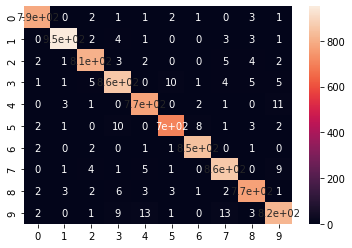

In [21]:
confusion = metrics.confusion_matrix(y_test, pred_3)
sns.heatmap(confusion, annot=True)

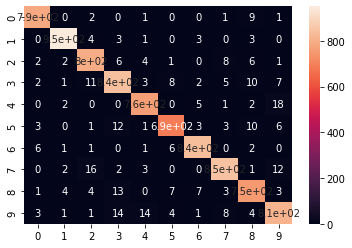

In [23]:
confusion = metrics.confusion_matrix(y_test, pred_6)
sns.heatmap(confusion, annot=True)

In [41]:
pca = decomposition.PCA(n_components=320)
std = preprocessing.StandardScaler()

x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)


x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [44]:
x_train_pca.shape, x_train_std.shape

((33600, 320), (33600, 784))

In [52]:
clf = ensemble.RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9627380952380953

In [48]:
clf = ensemble.RandomForestClassifier()
clf.fit(x_train_pca, y_train)
clf.score(x_test_pca, y_test)

0.9298809523809524

In [49]:
clf = ensemble.RandomForestClassifier()
clf.fit(x_train_std, y_train)
clf.score(x_test_std, y_test)

0.9638095238095238

In [53]:
clf = svm.SVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9745238095238096

In [50]:
clf = svm.SVC()
clf.fit(x_train_pca, y_train)
clf.score(x_test_pca, y_test)

0.9597619047619048

In [51]:
clf = svm.SVC()
clf.fit(x_train_std, y_train)
clf.score(x_test_std, y_test)

0.9569047619047619

As reslut, preprocessing won't make algorithms to work better

#Deep Learning Models

In [54]:
def plot_loss_curves(history):
  hist = history.history
  loss, val_loss = hist["loss"], hist["val_loss"]
  accuracy, val_accuracy = hist["accuracy"], hist["val_accuracy"]
  epochs = range(1, len(hist["loss"])+1)
  plt.title("Accuracy")
  plt.plot(epochs, accuracy, label="Training")
  plt.plot(epochs, val_accuracy, label="Testing")
  plt.legend()
  plt.figure()
  plt.title("Loss")
  plt.plot(epochs, loss, label="Training")
  plt.plot(epochs, val_loss, label="Testing")
  plt.legend()
  plt.show()  

##Model 0: 

In [70]:
model_0 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, input_shape=(784, )),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_0.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "accuracy"
)

In [71]:
model_0_history = model_0.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 5s 3ms/step - loss: 0.4682 - accuracy: 0.8609 - val_loss: 0.2641 - val_accuracy: 0.9212
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2308 - accuracy: 0.9301 - val_loss: 0.1902 - val_accuracy: 0.9427
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1841 - accuracy: 0.9430 - val_loss: 0.1729 - val_accuracy: 0.9482
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1684 - accuracy: 0.9479 - val_loss: 0.1830 - val_accuracy: 0.9455
Epoch 5/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1481 - accuracy: 0.9538 - val_loss: 0.1711 - val_accuracy: 0.9451
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1385 - accuracy: 0.9568 - val_loss: 0.1423 - val_accuracy: 0.9548
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1272 - accuracy: 0.9595 - val_loss: 0.1445 - val_accuracy:

In [73]:
pred=model_0.predict(x_test)
metrics.accuracy_score(y_test, np.argmax(pred, axis=1))

263/263 [==============================] - 1s 2ms/step


0.9592857142857143

##Model 1: CNN

In [74]:
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(128, 3, 1, activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(128, 3, 1, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

In [75]:
model_1_history=model_1.fit(x_train.reshape((-1 ,28, 28)), y_train, epochs=10, validation_data=(x_test.reshape((-1 ,28, 28)), y_test))

Epoch 1/10
1050/1050 [==============================] - 129s 122ms/step - loss: 0.1644 - accuracy: 0.9504 - val_loss: 0.0732 - val_accuracy: 0.9752
Epoch 2/10
1050/1050 [==============================] - 125s 119ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0472 - val_accuracy: 0.9857
Epoch 3/10
1050/1050 [==============================] - 124s 118ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0416 - val_accuracy: 0.9873
Epoch 4/10
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0504 - val_accuracy: 0.9861
Epoch 5/10
1050/1050 [==============================] - 122s 117ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0405 - val_accuracy: 0.9886
Epoch 6/10
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.0457 - val_accuracy: 0.9871
Epoch 7/10
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0109 - accuracy: 0.9969 - val_

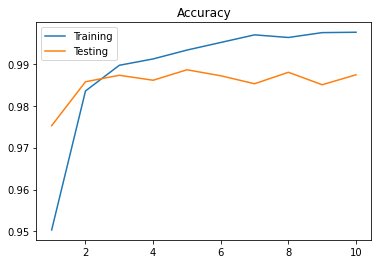

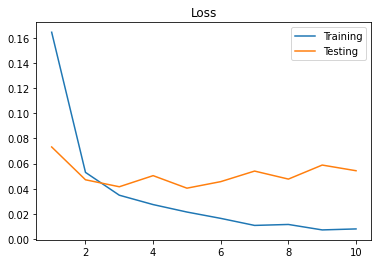

In [79]:
plot_loss_curves(model_1_history)

In [80]:
preds = model_1.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 8s 29ms/step


In [81]:
model_1.evaluate(x_train.reshape(-1, 28, 28, 1), y_train), model_1.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

263/263 [==============================] - 8s 29ms/step - loss: 0.0544 - accuracy: 0.9874


([0.00725381588563323, 0.9973511695861816],
 [0.05435185879468918, 0.9873809814453125])